<a href="https://colab.research.google.com/github/Rstam59/Machine-Learning-Projects/blob/main/neural_nets_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

<ipython-input-2-d41b10f4d90b>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


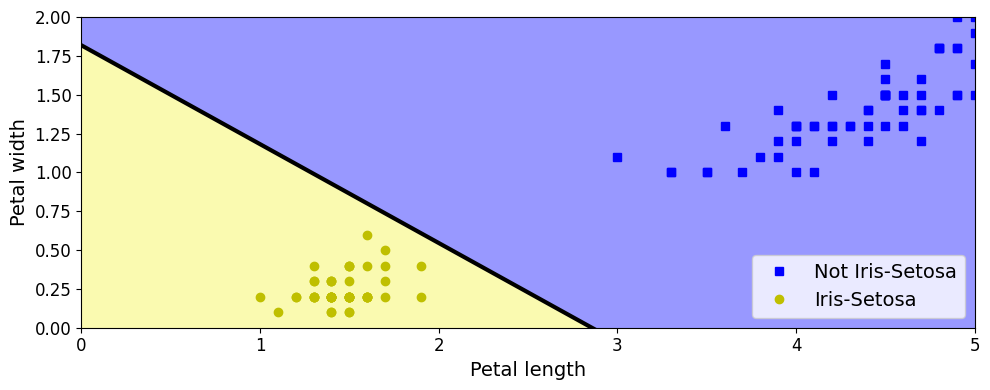

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

In [6]:
np.exp(2)

7.38905609893065

Saving figure activation_functions_plot


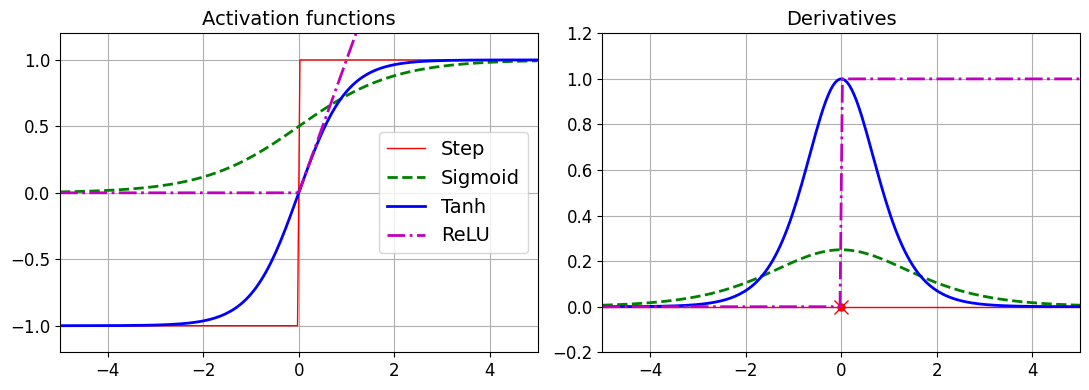

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [8]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

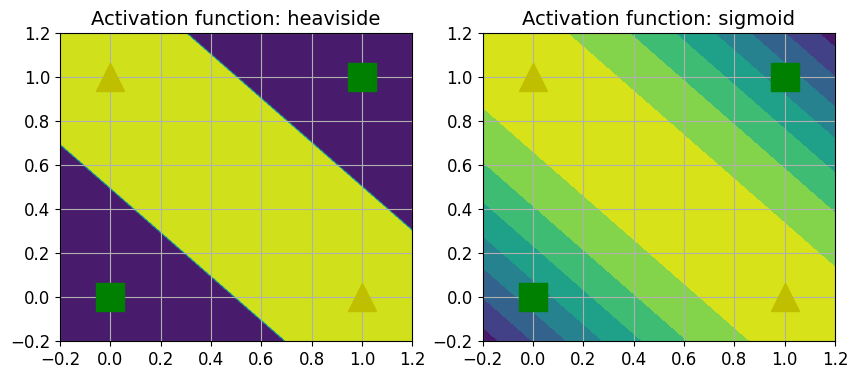

In [9]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [12]:
X_train_full.shape

(60000, 28, 28)

In [13]:
X_train_full.dtype

dtype('uint8')

In [14]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

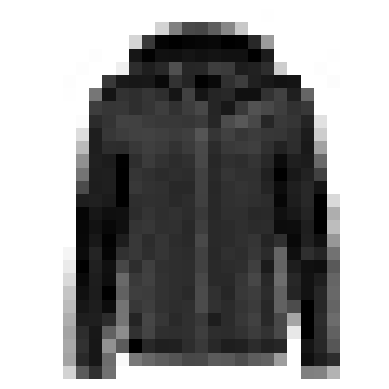

In [15]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
class_names[y_train[0]]

'Coat'

Saving figure fashion_mnist_plot


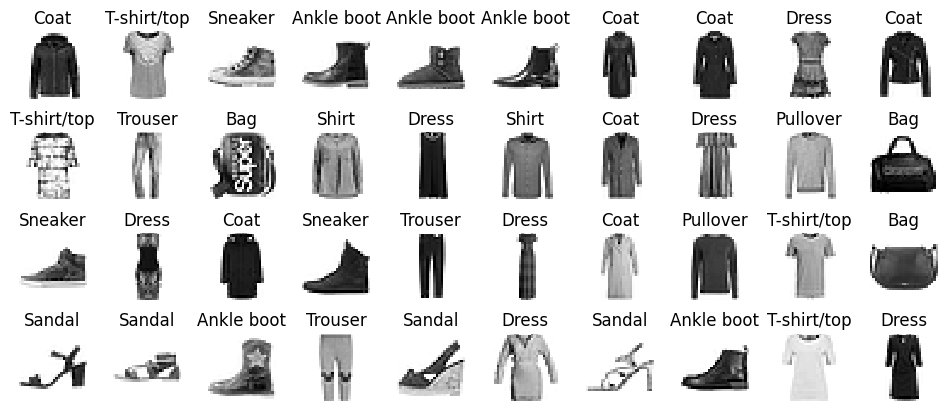

In [19]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [23]:
model.layers

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


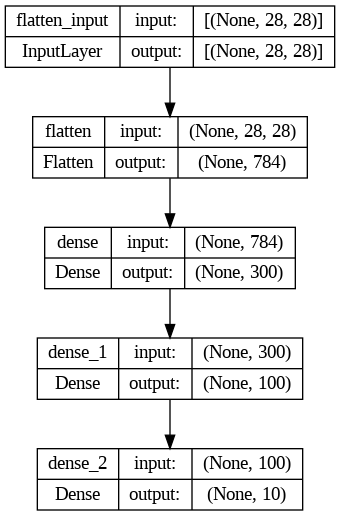

In [25]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [26]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [27]:
model.get_layer(hidden1.name) is hidden1

True

In [28]:
weights, biases = hidden1.get_weights()

In [29]:
weights

array([[ 0.0240518 , -0.03411043, -0.03740942, ..., -0.05282879,
         0.07173645,  0.00453195],
       [-0.02965984, -0.00315885, -0.04205874, ...,  0.00810166,
        -0.04628891,  0.06293358],
       [-0.02539035,  0.04638369, -0.02734765, ...,  0.0190386 ,
         0.01446068, -0.04192189],
       ...,
       [-0.05943483, -0.00595057,  0.04691269, ..., -0.01598128,
         0.02331337,  0.07115334],
       [-0.06506624, -0.05610771, -0.03722154, ..., -0.01147478,
         0.04958977, -0.06334017],
       [-0.07399491,  0.03779605,  0.04613976, ...,  0.0635799 ,
         0.05337681,  0.05751643]], dtype=float32)

In [30]:
weights.shape

(784, 300)

In [31]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
biases.shape

(300,)

In [33]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)

In [34]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 17s 6ms/step - loss: 0.7274 - accuracy: 0.7588 - val_loss: 0.5215 - val_accuracy: 0.8216
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4916 - accuracy: 0.8284 - val_loss: 0.4364 - val_accuracy: 0.8532
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4456 - accuracy: 0.8436 - val_loss: 0.5390 - val_accuracy: 0.7966
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4184 - accuracy: 0.8542 - val_loss: 0.3927 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3992 - accuracy: 0.8603 - val_loss: 0.3758 - val_accuracy: 0.8696
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3804 - accuracy: 0.8669 - val_loss: 0.3689 - val_accuracy: 0.8746
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3677 - accuracy: 0.8710 - val_loss: 0.3655 - val_accuracy

In [35]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

Saving figure keras_learning_curves_plot


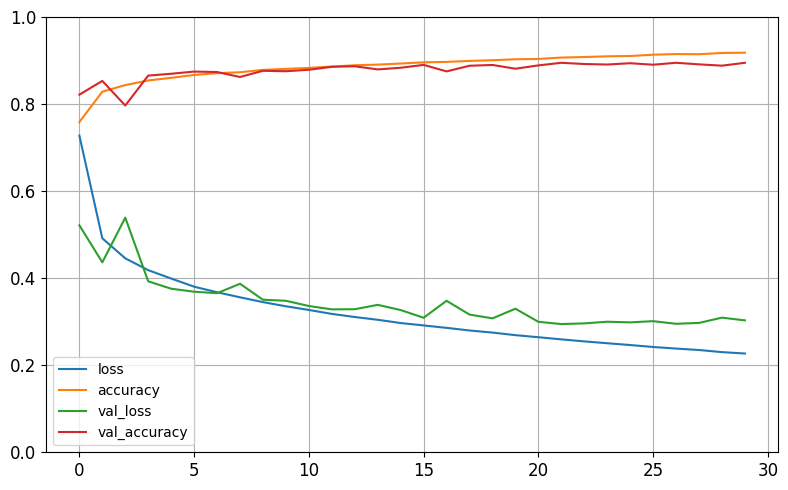

In [36]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [37]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3422 - accuracy: 0.8804


[0.34222865104675293, 0.8804000020027161]

In [38]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 74ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.96, 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 18ms/step


array([9, 2, 1])

In [40]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [41]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


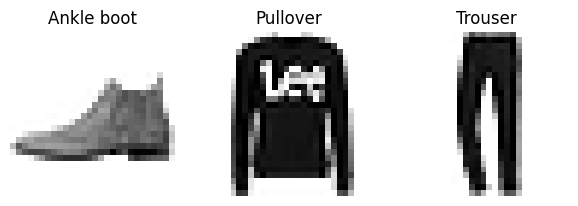

In [42]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

In [43]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [44]:
np.random.seed(42)
tf.random.set_seed(42)

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.3314 - val_loss: 1.1892
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8539 - val_loss: 0.7303
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7465 - val_loss: 0.7056
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6918 - val_loss: 0.6414
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6506 - val_loss: 0.5894
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6108 - val_loss: 0.5847
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5841 - val_loss: 0.5695
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5582 - val_loss: 0.5244
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5337 - val_loss: 0.4942
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5139 - val_loss: 0.5191

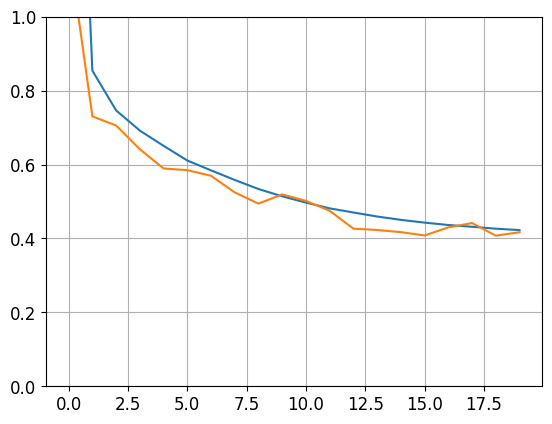

In [46]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [47]:
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
input_ = tf.keras.layers.Input(shape = X_train.shape[1:])
hidden1 = tf.keras.layers.Dense(30, activation = 'relu')(input_)
hidden2 = tf.keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = tf.keras.layers.concatenate([input_, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.models.Model(inputs = [input_], outputs = [output])

In [49]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 30)                   930       ['dense_5[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_6[0][0]']         

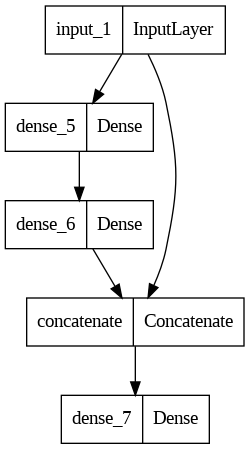

In [50]:
tf.keras.utils.plot_model(model)

In [51]:
model.compile(loss = 'mean_squared_error',
              optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3))

history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.8032 - val_loss: 0.8374
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7576 - val_loss: 0.7413
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6724 - val_loss: 0.6434
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6179 - val_loss: 0.5701
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5812 - val_loss: 0.5440
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5517 - val_loss: 0.5376
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5318 - val_loss: 0.5079
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5146 - val_loss: 0.4823
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4990 - val_loss: 0.4649
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4864 - val_loss: 0.4584

In [52]:
np.random.seed(42)
tf.random.set_seed(42)



In [53]:
input_A = tf.keras.layers.Input(shape = [5], name = 'wide_input')
input_B = tf.keras.layers.Input(shape = [6], name = 'deep_input')
hidden1 = tf.keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = tf.keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = tf.keras.layers.concatenate([input_A, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.models.Model(inputs = [input_A, input_B], outputs = [output])

In [54]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 30)                   210       ['deep_input[0][0]']          
                                                                                                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 30)                   930       ['dense_8[0][0]']             
                                                                                            

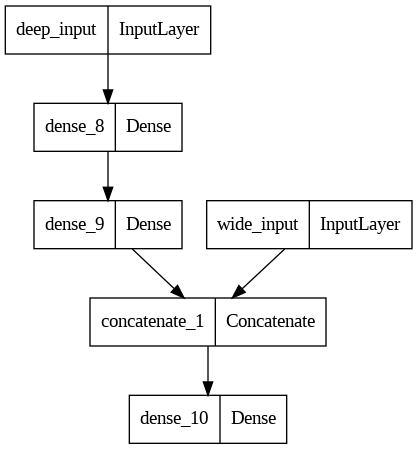

In [55]:
tf.keras.utils.plot_model(model)

In [56]:
model.compile(loss = 'mean_squared_error',
              optimizer = tf.keras.optimizers.SGD(1e-3))


In [57]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.9312 - val_loss: 0.9956
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.8006 - val_loss: 0.7242
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6975 - val_loss: 0.6404
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6511 - val_loss: 0.6353
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6215 - val_loss: 0.6054
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5975 - val_loss: 0.5544
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5784 - val_loss: 0.5356
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5618 - val_loss: 0.5399
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5456 - val_loss: 0.5055
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5318 - val_loss: 0.4983

In [58]:
np.random.seed(42)
tf.random.set_seed(42)

In [59]:
input_A = tf.keras.layers.Input(shape = [5], name = 'wide_input')
input_B = tf.keras.layers.Input(shape = [6], name = 'deep_input')
hidden1 = tf.keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = tf.keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = tf.keras.layers.concatenate([input_A, hidden2])
output = tf.keras.layers.Dense(1, name = 'main_output')(concat)
output_aux = tf.keras.layers.Dense(1, name = 'aux_output')(hidden2)
model = tf.keras.models.Model(inputs = [input_A, input_B],
                              outputs = [output, output_aux])

In [60]:
model.compile(loss = ['mse', 'mse'], loss_weights = [0.9, 0.1], optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3))

In [61]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs = 20,
                    validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 2.3871 - main_output_loss: 2.1266 - aux_output_loss: 4.7312 - val_loss: 1.6671 - val_main_output_loss: 1.4353 - val_aux_output_loss: 3.7533
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 1.1200 - main_output_loss: 0.9240 - aux_output_loss: 2.8846 - val_loss: 0.9641 - val_main_output_loss: 0.8078 - val_aux_output_loss: 2.3709
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.8885 - main_output_loss: 0.7557 - aux_output_loss: 2.0833 - val_loss: 0.8650 - val_main_output_loss: 0.7594 - val_aux_output_loss: 1.8158
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7933 - main_output_loss: 0.6895 - aux_output_loss: 1.7269 - val_loss: 0.7692 - val_main_output_loss: 0.6801 - val_aux_output_loss: 1.5709
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.7364 - main_output_loss: 0.6463 - aux_output_loss: 1.5469 - val_loss

In [62]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 3ms/step - loss: 0.4740 - main_output_loss: 0.4229 - aux_output_loss: 0.9343


1/1 [==============================] - 0s 64ms/step


In [63]:
total_loss, main_loss, aux_loss

(0.4740290641784668, 0.42288902401924133, 0.9342887997627258)

In [64]:
class WideAndDeepModel(tf.keras.models.Model):
  def __init__(self, units = 30, activation = 'relu', **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = tf.keras.layers.Dense(units, activation = activation)
    self.hidden2 = tf.keras.layers.Dense(units, activation = activation)
    self.main_output = tf.keras.layers.Dense(1)
    self.aux_output = tf.keras.layers.Dense(1)


  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = tf.keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output


model = WideAndDeepModel(30, activation = 'relu')


In [65]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 3s 5ms/step - loss: 1.9144 - output_1_loss: 1.7288 - output_2_loss: 3.5849 - val_loss: 2.5835 - val_output_1_loss: 2.1591 - val_output_2_loss: 6.4030
Epoch 2/10
363/363 [==============================] - 2s 7ms/step - loss: 0.8781 - output_1_loss: 0.7285 - output_2_loss: 2.2242 - val_loss: 1.3863 - val_output_1_loss: 0.8683 - val_output_2_loss: 6.0491
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7480 - output_1_loss: 0.6374 - output_2_loss: 1.7435 - val_loss: 1.1370 - val_output_1_loss: 0.6217 - val_output_2_loss: 5.7745
Epoch 4/10
363/363 [==============================] - 2s 4ms/step - loss: 0.6903 - output_1_loss: 0.5964 - output_2_loss: 1.5362 - val_loss: 1.0360 - val_output_1_loss: 0.5583 - val_output_2_loss: 5.3349
Epoch 5/10
363/363 [==============================] - 2s 4ms/step - loss: 0.6555 - output_1_loss: 0.5700 - output_2_loss: 1.4248 - val_loss: 0.9593 - val_output_1_loss: 0.5303 - val_ou

1/1 [==============================] - 0s 59ms/step


In [66]:
np.random.seed(42)
tf.random.set_seed(42)

In [67]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [68]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 2.1569 - val_loss: 1.5734
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.8681 - val_loss: 0.8384
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6695 - val_loss: 0.6587
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5959 - val_loss: 0.5357
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5534 - val_loss: 0.5017
Epoch 6/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5222 - val_loss: 0.4752
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4984 - val_loss: 0.4582
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4794 - val_loss: 0.4448
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4640 - val_loss: 0.4270
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4362


In [69]:
model.save('my_keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [70]:
model = keras.models.load_model("my_keras_model.h5")

In [71]:
model.predict(X_new)

1/1 [==============================] - 0s 47ms/step


array([[0.6156989],
       [1.3565794],
       [3.2589698]], dtype=float32)

In [72]:
model.save_weights("my_keras_weights.ckpt")

In [73]:
model.load_weights("my_keras_weights.ckpt")

In [74]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [75]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [76]:
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.SGD(learning_rate = (1e-3)))
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only = True)

history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb])


model = tf.keras.models.load_model('/content/my_keras_model.h5')
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.8807 - val_loss: 0.8541
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.8017 - val_loss: 0.7690
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7001 - val_loss: 0.6441
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6399 - val_loss: 0.5860
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5970 - val_loss: 0.5490
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5615 - val_loss: 0.5151
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5321 - val_loss: 0.4928
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5069 - val_loss: 0.4703
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4850 - val_loss: 0.4459
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4538


In [77]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [78]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

351/363 [============================>.] - ETA: 0s - loss: 0.4489
val/train: 0.94
363/363 [==============================] - 2s 3ms/step - loss: 0.4519 - val_loss: 0.4226


In [79]:
root_logdir = os.path.join(os.curdir, 'my_logs')
root_logdir

'./my_logs'

In [80]:
import time

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2023_10_17-19_36_02'

In [81]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [82]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [83]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 1.8521 - val_loss: 0.8119
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.6834 - val_loss: 0.5984
Epoch 3/30
363/363 [==============================] - 2s 5ms/step - loss: 0.6020 - val_loss: 0.5475
Epoch 4/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5542 - val_loss: 0.5047
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5185 - val_loss: 0.4732
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4901 - val_loss: 0.4539
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4693 - val_loss: 0.4359
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4535 - val_loss: 0.4326
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4417 - val_loss: 0.4276
Epoch 10/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4325 - val_loss: 0.4309

In [84]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

<IPython.core.display.Javascript object>

In [85]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2023_10_17-19_37_30'

In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [87]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5506 - val_loss: 1.1361
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3946 - val_loss: 1.1131
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3770 - val_loss: 0.3481
Epoch 4/30
 55/363 [===>..........................] - ETA: 0s - loss: 0.4039

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 4ms/step - loss: 0.3587 - val_loss: 0.3385
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3506 - val_loss: 0.3884
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3420 - val_loss: 0.3327
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3356 - val_loss: 0.3192
Epoch 8/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3282 - val_loss: 0.3103
Epoch 9/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3218 - val_loss: 0.3159
Epoch 10/30
363/363 [==============================] - 2s 4ms/step - loss: 0.3186 - val_loss: 0.3245
Epoch 11/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3178 - val_loss: 0.3070
Epoch 12/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3252 - val_loss: 0.3950
Epoch 13/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3233 - val_loss: 0.2906
Epoch 1

In [88]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.src.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



In [89]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [90]:
def build_model(n_hidden = 1, n_neurons = 30, learning_rate = 3e-3, input_shape = [8]):
  model = tf.keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape = input_shape))
  for layer in range(n_hidden):
    model.add(tf.keras.layers.Dense(n_neurons, activation = 'relu'))
  model.add(tf.keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss="mse", optimizer=optimizer)
  return model


In [91]:
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
# keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [96]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [97]:
X_train_full.shape

(60000, 28, 28)

In [98]:
X_train_full.dtype

dtype('uint8')

In [99]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

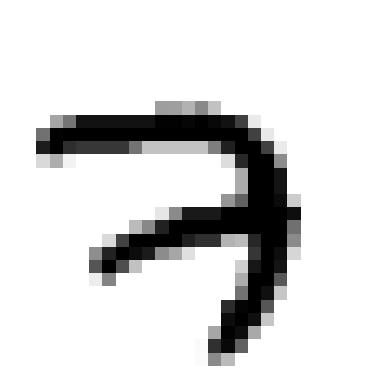

In [100]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

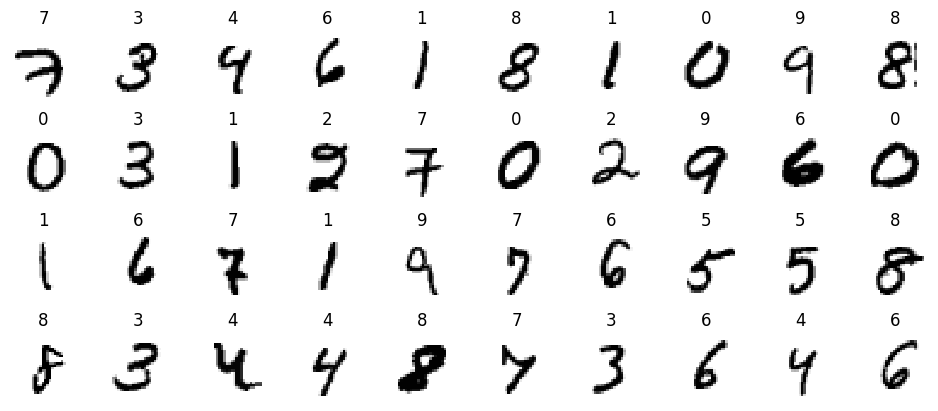

In [107]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [108]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [109]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [110]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [111]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

   1/1719 [..............................] - ETA: 28:24 - loss: 2.3314 - accuracy: 0.1562

1719/1719 [==============================] - 12s 6ms/step - loss: 3799142106086372664147968.0000 - accuracy: 0.5987 - val_loss: 2.3912 - val_accuracy: 0.1126


Text(0, 0.5, 'Loss')

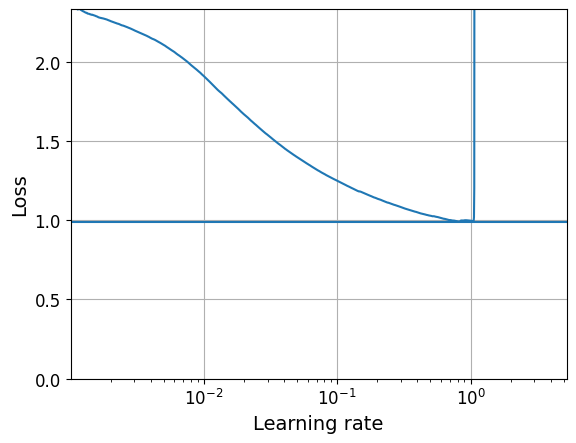

In [112]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")